<a href="https://colab.research.google.com/github/javatta/project/blob/main/Sinotech_Professionalism_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка зависимостей
import os
import requests
import re
import time
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
from nltk import ngrams
from spacy.lang.zh.stop_words import STOP_WORDS

# Загрузка китайской модели
try:
    nlp = spacy.load("zh_core_web_sm")
except OSError:
    !python -m spacy download zh_core_web_sm
    nlp = spacy.load("zh_core_web_sm")

# Скачиваем шрифт для графиков
!wget -q "https://github.com/google/fonts/raw/main/ofl/notosanssc/NotoSansSC%5Bwght%5D.ttf" -O font.ttf
prop = fm.FontProperties(fname='font.ttf')

In [2]:
# Список проектов и прямые ссылки на их RAW README
projects = {
    "HanLP": "https://raw.githubusercontent.com/hankcs/HanLP/master/README.md",
    "LTP": "https://raw.githubusercontent.com/HIT-SCIR/ltp/master/README.md",
    "THULAC": "https://raw.githubusercontent.com/thunlp/THULAC-Python/master/README.md",
    "bert4torch": "https://raw.githubusercontent.com/Tongjilibo/bert4torch/master/README.md",
    "Chinese-CLIP": "https://raw.githubusercontent.com/OFA-Sys/Chinese-CLIP/master/README.md",
    "jieba": "https://raw.githubusercontent.com/fxsjy/jieba/master/README.md",
    "FastHan": "https://raw.githubusercontent.com/fastnlp/fastHan/master/README.md"
}

def download_readmes(project_dict, folder="raw_data"):
    if not os.path.exists(folder):
        os.makedirs(folder)
        print(f"Папка '{folder}' создана")

    for name, url in project_dict.items():
        try:
            response = requests.get(url)
            response.raise_for_status() # Проверка на ошибки

            # Сохраняем файл
            filename = os.path.join(folder, f"{name}.md")
            with open(filename, "w", encoding="utf-8") as f:
                f.write(response.text)
            print(f"Скачан: {name}")
        except Exception as e:
            print(f"Ошибка при скачивании {name}: {e}")

def build_dataset(folder="raw_data"):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".md") or filename.endswith(".txt"):
            path = os.path.join(folder, filename)
            print(path)
            with open(path, "r", encoding="utf-8") as f:
                content = f.read()
                data.append({
                    "name": filename,
                    "source": "README",
                    "text": content
                })

    df = pd.DataFrame(data)
    return df

download_readmes(projects)

df = build_dataset()

print("\n Итоговая таблица:")
print(df.head())

Скачан: HanLP
Скачан: LTP
Скачан: THULAC
Скачан: bert4torch
Скачан: Chinese-CLIP
Скачан: jieba
Скачан: FastHan
raw_data/FastHan.md
raw_data/Chinese-CLIP.md
raw_data/THULAC.md
raw_data/LTP.md
raw_data/jieba.md
raw_data/HanLP.md
raw_data/bert4torch.md

 Итоговая таблица:
              name  source                                               text
0       FastHan.md  README  # fastHan\n\n\n**致歉：fastHan的模型因为服务器故障导致参数丢失，暂时...
1  Chinese-CLIP.md  README  [**中文说明**](README.md) | [**English**](README_E...
2        THULAC.md  README  # THULAC：一个高效的中文词法分析工具包\n## 目录\n* [项目介绍](#项目介绍...
3           LTP.md  README  [![LTP](https://img.shields.io/pypi/v/ltp?labe...
4         jieba.md  README  jieba\n========\n“结巴”中文分词：做最好的 Python 中文分词组件\n...


In [3]:
def clean_markdown(text):
    # Удаляем блоки кода
    text = re.sub(r'```[\s\S]*?```', '', text)

    # Удаляем теги
    text = re.sub(r'<[^>]+>', '', text)

    # Удаляем короткий код внутри строк
    text = re.sub(r'`.*?`', '', text)

    # Удаляем изображения и ссылки
    text = re.sub(r'!\[.*?\]\(.*?\)', '', text)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # Удаляем обычные utl
    text = re.sub(r'http\S+', '', text)

    # Cпецсимволы
    text = re.sub(r'[#*_\->|+=]', ' ', text)

    # Cлишком много пробелов и переносов строк
    text = re.sub(r'\s+', ' ', text).strip()

    # удаляет не  иероглиф, не буква и не пробел
    text = re.sub(r'[^\u4e00-\u9fa5\s]', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['cleaned_text'] = df['text'].apply(clean_markdown)

print("Оригинал:")
print(df['text'].iloc[0][:200])

print("\nЧистый текст")
print(df['cleaned_text'].iloc[0][:200])

df

Оригинал:
# fastHan


**致歉：fastHan的模型因为服务器故障导致参数丢失，暂时停止服务。我们将尽快开始下一版迭代，敬请期待。同时，如果有已经下载或保存参数的朋友，恳请您与我们联系，万分感谢。**


## 简介
fastHan是基于[fastNLP](https://github.com/fastnlp/fastNLP)与pytorch实现的中文自然语言处理工具，像spacy一样调用方便。

Чистый текст
致歉 的模型因为服务器故障导致参数丢失 暂时停止服务 我们将尽快开始下一版迭代 敬请期待 同时 如果有已经下载或保存参数的朋友 恳请您与我们联系 万分感谢 简介 是基于与 实现的中文自然语言处理工具 像 一样调用方便 其内核为基于 的联合模型 其在 个语料库中进行训练 可处理中文分词 词性标注 依存分析 命名实体识别多项任务 从 开始 在原有的基础上 增加了对古汉语分词 古汉语词性标注的处理 此外


,name,source,text,cleaned_text
0,FastHan.md,README,# fastHan\n\n\n**致歉：fastHan的模型因为服务器故障导致参数丢失，暂时...,致歉 的模型因为服务器故障导致参数丢失 暂时停止服务 我们将尽快开始下一版迭代 敬请期待 同...
1,Chinese-CLIP.md,README,[**中文说明**](README.md) | [**English**](README_E...,本项目为 模型的 中文 版本 使用大规模中文数据进行训练 亿图文对 旨在帮助用户快速实现中文...
2,THULAC.md,README,# THULAC：一个高效的中文词法分析工具包\n## 目录\n* [项目介绍](#项目介绍...,一个高效的中文词法分析工具包 目录 项目介绍 由清华大学自然语言处理与社会人文计算实验室研制...
3,LTP.md,README,[![LTP](https://img.shields.io/pypi/v/ltp?labe...,提供了一系列中文自然语言处理工具 用户可以使用这些工具对于中文文本进行分词 词性标注 句法分...
4,jieba.md,README,jieba\n========\n“结巴”中文分词：做最好的 Python 中文分词组件\n...,结巴 中文分词 做最好的 中文分词组件 特点 支持四种分词模式 精确模式 试图将句子最精确地...
5,HanLP.md,README,"<div align=""center""><img src=""https://file.han...",中文 日本語
6,bert4torch.md,README,![bert4torch](./docs/pics/bert4torch.png)\n\n[...,目录 下载安装 安装稳定版 安装最新版 注意事项 包的发布慢于 上的开发版本 注意引用路径 ...


In [4]:
# Китайская модель
nlp = spacy.load("zh_core_web_sm")

def process_chinese_text(text):
    doc = nlp(text[:100000])

    # Собираем список кортежей (слово, часть речи) и фильтруем
    tokens_data = [
        (token.text, token.pos_)
        for token in doc
        if not token.is_punct and not token.is_space and token.pos_ != "NUM"
    ]
    return tokens_data

df['tokens_pos'] = df['cleaned_text'].apply(process_chinese_text)

# Разворачиваем все слова в один большой список
all_tokens = [item for sublist in df['tokens_pos'] for item in sublist]

print(f"Всего слов обработано: {len(all_tokens)}")

df

Всего слов обработано: 6394


,name,source,text,cleaned_text,tokens_pos
0,FastHan.md,README,# fastHan\n\n\n**致歉：fastHan的模型因为服务器故障导致参数丢失，暂时...,致歉 的模型因为服务器故障导致参数丢失 暂时停止服务 我们将尽快开始下一版迭代 敬请期待 同...,"[(致歉, VERB), (的, PART), (模型, NOUN), (因为, ADP),..."
1,Chinese-CLIP.md,README,[**中文说明**](README.md) | [**English**](README_E...,本项目为 模型的 中文 版本 使用大规模中文数据进行训练 亿图文对 旨在帮助用户快速实现中文...,"[(本, DET), (项目, NOUN), (为, ADP), (模型, NOUN), (..."
2,THULAC.md,README,# THULAC：一个高效的中文词法分析工具包\n## 目录\n* [项目介绍](#项目介绍...,一个高效的中文词法分析工具包 目录 项目介绍 由清华大学自然语言处理与社会人文计算实验室研制...,"[(一个, ADV), (高效, VERB), (的, PART), (中文, NOUN),..."
3,LTP.md,README,[![LTP](https://img.shields.io/pypi/v/ltp?labe...,提供了一系列中文自然语言处理工具 用户可以使用这些工具对于中文文本进行分词 词性标注 句法分...,"[(提供, VERB), (了, PART), (中文, NOUN), (自然, NOUN)..."
4,jieba.md,README,jieba\n========\n“结巴”中文分词：做最好的 Python 中文分词组件\n...,结巴 中文分词 做最好的 中文分词组件 特点 支持四种分词模式 精确模式 试图将句子最精确地...,"[(结巴, VERB), (中文, NOUN), (分词, VERB), (做, VERB)..."
5,HanLP.md,README,"<div align=""center""><img src=""https://file.han...",中文 日本語,"[(中文, NOUN), (日本, PROPN), (語, NOUN)]"
6,bert4torch.md,README,![bert4torch](./docs/pics/bert4torch.png)\n\n[...,目录 下载安装 安装稳定版 安装最新版 注意事项 包的发布慢于 上的开发版本 注意引用路径 ...,"[(目录, NOUN), (下载, VERB), (安装, VERB), (安装, VERB..."


In [5]:
# Считаем частоту слов
word_freq = Counter([word for word, pos in all_tokens])

print("Топ-20 самых частых слов: ")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

Топ-20 самых частых слов: 
的: 378
模型: 138
分词: 109
在: 79
使用: 79
和: 67
训练: 63
了: 58
为: 57
进行: 51
版本: 46
我们: 44
文件: 44
数据: 43
如下: 43
将: 42
中: 42
词性: 37
可: 36
可以: 36


In [6]:
#ТОКЕНИЗИРУЕМ

def is_chinese(text):
    # Проверяет, есть ли китайские иероглифы
    return bool(re.search(r'[\u4e00-\u9fa5]', text))

def process_only_chinese(text):
    # nlp — это загруженная ранее zh_core_web_sm
    doc = nlp(text[:100000])
    filtered_tokens = []

    for token in doc:
        word = token.text
        if (
            is_chinese(word)                # Только китайские иероглифы
            and word not in STOP_WORDS       # Нет в стоп-листе
            and len(word) > 1                # Больше 1 иероглифа
            and not token.is_space           # Не пробел
            and token.pos_ not in ["PUNCT", "NUM"] # Не знаки и не цифры
        ):
            filtered_tokens.append((word,token.pos_))
    return filtered_tokens

df['tokens_pos'] = df['cleaned_text'].apply(process_only_chinese)

all_tokens = [item for sublist in df['tokens_pos'] for item in sublist]

# Считаем частоту слов
word_freq = Counter([word for word in all_tokens])

print("Только китайский топ 20-униграмм:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")
df

Только китайский топ 20-униграмм:
('模型', 'NOUN'): 137
('分词', 'NOUN'): 63
('训练', 'NOUN'): 52
('版本', 'NOUN'): 46
('分词', 'VERB'): 45
('文件', 'NOUN'): 44
('数据', 'NOUN'): 43
('中文', 'NOUN'): 35
('词性', 'NOUN'): 35
('词典', 'NOUN'): 33
('标注', 'VERB'): 32
('代码', 'NOUN'): 32
('参数', 'NOUN'): 31
('路径', 'NOUN'): 27
('测试', 'NOUN'): 26
('指定', 'VERB'): 26
('用户', 'NOUN'): 25
('模式', 'NOUN'): 25
('数据集', 'NOUN'): 23
('标签', 'NOUN'): 21


,name,source,text,cleaned_text,tokens_pos
0,FastHan.md,README,# fastHan\n\n\n**致歉：fastHan的模型因为服务器故障导致参数丢失，暂时...,致歉 的模型因为服务器故障导致参数丢失 暂时停止服务 我们将尽快开始下一版迭代 敬请期待 同...,"[(致歉, VERB), (模型, NOUN), (服务器, NOUN), (故障, NOU..."
1,Chinese-CLIP.md,README,[**中文说明**](README.md) | [**English**](README_E...,本项目为 模型的 中文 版本 使用大规模中文数据进行训练 亿图文对 旨在帮助用户快速实现中文...,"[(项目, NOUN), (模型, NOUN), (中文, NOUN), (版本, NOUN..."
2,THULAC.md,README,# THULAC：一个高效的中文词法分析工具包\n## 目录\n* [项目介绍](#项目介绍...,一个高效的中文词法分析工具包 目录 项目介绍 由清华大学自然语言处理与社会人文计算实验室研制...,"[(高效, VERB), (中文, NOUN), (词法, NOUN), (分析, NOUN..."
3,LTP.md,README,[![LTP](https://img.shields.io/pypi/v/ltp?labe...,提供了一系列中文自然语言处理工具 用户可以使用这些工具对于中文文本进行分词 词性标注 句法分...,"[(提供, VERB), (中文, NOUN), (自然, NOUN), (语言, NOUN..."
4,jieba.md,README,jieba\n========\n“结巴”中文分词：做最好的 Python 中文分词组件\n...,结巴 中文分词 做最好的 中文分词组件 特点 支持四种分词模式 精确模式 试图将句子最精确地...,"[(结巴, VERB), (中文, NOUN), (分词, VERB), (中文, NOUN..."
5,HanLP.md,README,"<div align=""center""><img src=""https://file.han...",中文 日本語,"[(中文, NOUN), (日本, PROPN)]"
6,bert4torch.md,README,![bert4torch](./docs/pics/bert4torch.png)\n\n[...,目录 下载安装 安装稳定版 安装最新版 注意事项 包的发布慢于 上的开发版本 注意引用路径 ...,"[(目录, NOUN), (下载, VERB), (安装, VERB), (安装, VERB..."


In [7]:
words_only = [word for word, pos in all_tokens]

# Создаем пары соседних слов
bigrams = list(ngrams(words_only, 2))

bigram_freq = Counter(bigrams)

print("\n Топ-20 биграмм:")
for gram, count in bigram_freq.most_common(20):
    print(f"{''.join(gram)}: {count}")


 Топ-20 биграмм:
词性标注: 26
分词词性: 19
分词版本: 16
结巴分词: 12
作者地址: 12
版本作者: 11
运行命令: 10
地址结巴: 10
阿里云阿里云: 9
中文分词: 8
追一科技: 8
命名实体: 7
加载模型: 7
模型用户: 7
模型输出: 7
模型分词: 7
上海人工: 7
人工智能: 7
智能实验室: 7
深度求索: 7


In [8]:
# Ссылка на дерево файлов проекта
api_url = "https://api.github.com/repos/PaddlePaddle/PaddleNLP/git/trees/develop?recursive=1"

response = requests.get(api_url)
data = response.json()

# Проверяем, что ответ не пустой
if 'tree' in data:
    all_files = data['tree']
    print(f"Всего файлов в проекте: {len(all_files)}")

md_files = []

for item in all_files:
    path = item['path']

    # Проверяем тип = файл
    if item['type'] == 'blob' and path.endswith('.md'):

        if 'docs/' in path:
          if ('zh' in path or 'ch' in path) and 'en' not in path:
            md_files.append(path)

print(f"Найдено китайских файлов: {len(md_files)}")
print(md_files[:10])

Всего файлов в проекте: 7164
Найдено китайских файлов: 82
['docs/zh/FAQ.md', 'docs/zh/advanced_guide/prompt.md', 'docs/zh/community/rfcs/20230304_api_design_for_tie_weight_task_103.md', 'docs/zh/community/rfcs/api_design_template.md', 'docs/zh/compression.md', 'docs/zh/data.md', 'docs/zh/data_prepare/dataset_list.md', 'docs/zh/dataaug.md', 'docs/zh/datasets.md', 'docs/zh/get_started/chat_template.md']


In [9]:
all_texts = []
# Число предыдущего подсчета файлов
for path in md_files:
    # Сформируем ссылку
    raw_url = f'https://raw.githubusercontent.com/PaddlePaddle/PaddleNLP/develop/{path}'

    response = requests.get(raw_url)

    all_texts.append({
        "name": path,
        'source': 'API',
        "text": response.text})

    time.sleep(0.1)
df_paddle = pd.DataFrame(all_texts)
df_paddle

,name,source,text
0,docs/zh/FAQ.md,API,## PaddleNLP 常见问题汇总（持续更新）\n\n+ [【精选】NLP 精选5问](...
1,docs/zh/advanced_guide/prompt.md,API,# 提示学习：Prompt API\n\n随着预训练语言模型规模的增长，“预训练-微调”范式...
2,docs/zh/community/rfcs/20230304_api_design_for...,API,# No.103：新增 tie_weights 能力\n\n| API 名称 | ...
3,docs/zh/community/rfcs/api_design_template.md,API,# 标题\n\n标题如：paddle.io.dataset 设计文档\n|API 名称 | ...
4,docs/zh/compression.md,API,# PaddleNLP 模型压缩 API\n\n **目录**\n * [模型压缩 AP...
...,...,...,...
77,llm/docs/chat_template.md,API,# 多轮对话精调教程\n\n当前开源Chat 类型模型越来越多，PaddleNLP 已经集成...
78,llm/docs/torch2paddle.md,API,# Torch2Paddle 权重转换教程\n\n## 转化 Pytorch 权重\nPad...
79,llm/docs/unified_checkpoint.md,API,# 飞桨大模型统一存储文档\n\n## 1. 背景\n\n在大模型背景下，通常我们需要进行多...
80,slm/examples/torch_migration/docs/ThesisReprod...,API,# 论文复现指南\n\n## 目录\n\n- [1. 总览](#1)\n - [1.1...


In [10]:
# Применяем очистку к df_paddle
df_paddle['cleaned_text'] = df_paddle['text'].apply(clean_markdown)
df_paddle[:3]
df_paddle.tail(5)
# Применяем функцию к очищенному тексту
df_paddle['tokens_pos'] = df_paddle['cleaned_text'].apply(process_only_chinese)

# Сплющиваем колонку tokens_pos в один длинный список
all_tokens_paddle = [item for sublist in df_paddle['tokens_pos'] for item in sublist]
# Фильр пустого содержания
df_paddle_clean = df_paddle[df_paddle['tokens_pos'].apply(len) > 0]
final_df = pd.concat([df, df_paddle_clean], ignore_index=True)
final_df

,name,source,text,cleaned_text,tokens_pos
0,FastHan.md,README,# fastHan\n\n\n**致歉：fastHan的模型因为服务器故障导致参数丢失，暂时...,致歉 的模型因为服务器故障导致参数丢失 暂时停止服务 我们将尽快开始下一版迭代 敬请期待 同...,"[(致歉, VERB), (模型, NOUN), (服务器, NOUN), (故障, NOU..."
1,Chinese-CLIP.md,README,[**中文说明**](README.md) | [**English**](README_E...,本项目为 模型的 中文 版本 使用大规模中文数据进行训练 亿图文对 旨在帮助用户快速实现中文...,"[(项目, NOUN), (模型, NOUN), (中文, NOUN), (版本, NOUN..."
2,THULAC.md,README,# THULAC：一个高效的中文词法分析工具包\n## 目录\n* [项目介绍](#项目介绍...,一个高效的中文词法分析工具包 目录 项目介绍 由清华大学自然语言处理与社会人文计算实验室研制...,"[(高效, VERB), (中文, NOUN), (词法, NOUN), (分析, NOUN..."
3,LTP.md,README,[![LTP](https://img.shields.io/pypi/v/ltp?labe...,提供了一系列中文自然语言处理工具 用户可以使用这些工具对于中文文本进行分词 词性标注 句法分...,"[(提供, VERB), (中文, NOUN), (自然, NOUN), (语言, NOUN..."
4,jieba.md,README,jieba\n========\n“结巴”中文分词：做最好的 Python 中文分词组件\n...,结巴 中文分词 做最好的 中文分词组件 特点 支持四种分词模式 精确模式 试图将句子最精确地...,"[(结巴, VERB), (中文, NOUN), (分词, VERB), (中文, NOUN..."
5,HanLP.md,README,"<div align=""center""><img src=""https://file.han...",中文 日本語,"[(中文, NOUN), (日本, PROPN)]"
6,bert4torch.md,README,![bert4torch](./docs/pics/bert4torch.png)\n\n[...,目录 下载安装 安装稳定版 安装最新版 注意事项 包的发布慢于 上的开发版本 注意引用路径 ...,"[(目录, NOUN), (下载, VERB), (安装, VERB), (安装, VERB..."
7,docs/zh/FAQ.md,API,## PaddleNLP 常见问题汇总（持续更新）\n\n+ [【精选】NLP 精选5问](...,常见问题汇总 持续更新 精选 精选 问 如何加载自己的本地数据集 以便使用 的功能 通过使用...,"[(常见, ADJ), (汇总, NOUN), (持续, ADJ), (更新, NOUN),..."
8,docs/zh/advanced_guide/prompt.md,API,# 提示学习：Prompt API\n\n随着预训练语言模型规模的增长，“预训练-微调”范式...,提示学习 随着预训练语言模型规模的增长 预训练 微调 范式在下游自然语言处理任务上的表现越来...,"[(提示, NOUN), (学习, VERB), (预训练, NOUN), (语言, NOU..."
9,docs/zh/community/rfcs/20230304_api_design_for...,API,# No.103：新增 tie_weights 能力\n\n| API 名称 | ...,新增 能力 名称 新增 名称 提交作者 丘文波 刘旺旺 提交时间 版本号 依赖飞桨版本 如无...,"[(新增, ADJ), (能力, NOUN), (名称, NOUN), (新增, ADJ),..."


In [11]:
# Считаем частоту
from collections import Counter
word_freq_paddle = Counter([word for word, pos in all_tokens_paddle])

print("Топ-20 из PaddleNLP: ")
for word, count in word_freq_paddle.most_common(20):
    print(f"{word}: {count}")

Топ-20 из PaddleNLP: 
模型: 419
训练: 234
数据: 212
参数: 204
文件: 131
支持: 123
句子: 119
参考: 106
数据集: 98
文本: 97
定义: 93
中文: 90
标签: 89
输入: 88
代码: 84
自定义: 82
方法: 78
提示: 78
策略: 75
保存: 69


In [12]:
# Продолжаем считать топы
verbs_only = [word for sublist in final_df['tokens_pos'] for word, pos in sublist if pos == "VERB"]
verb_freq = Counter(verbs_only)
print("Топ-20 ГЛАГОЛОВ:")
for word, count in verb_freq.most_common(20):
    print(f"{word}: {count}")

nouns_only = [word for sublist in final_df['tokens_pos'] for word, pos in sublist if pos == "NOUN"]
verb_freq = Counter(nouns_only)
print("\nТоп-20 СУЩЕСТВИТЕЛЬНЫХ:")
for word, count in verb_freq.most_common(20):
    print(f"{word}: {count}")

Топ-20 ГЛАГОЛОВ:
支持: 113
保存: 82
用于: 69
参考: 69
提供: 69
定义: 66
输入: 63
介绍: 58
标注: 57
预训: 54
设置: 53
训练: 52
增强: 52
分词: 50
调用: 45
计算: 44
压缩: 43
指定: 43
包含: 42
选择: 41

Топ-20 СУЩЕСТВИТЕЛЬНЫХ:
模型: 556
数据: 255
训练: 245
参数: 232
文件: 175
句子: 133
中文: 125
文本: 118
代码: 113
标签: 110
数据集: 99
自定义: 89
方法: 86
分词: 80
提示: 78
策略: 77
功能: 75
方式: 74
版本: 69
过程: 69


In [13]:
clean_nn_pairs = []
# Собираем всё в один список пар
all_global_tokens = [item for sublist in final_df['tokens_pos'] for item in sublist]
for i in range(len(all_global_tokens) - 1):
    word1, pos1 = all_global_tokens[i]
    word2, pos2 = all_global_tokens[i + 1]

    if (
        pos1 == "NOUN" and pos2 == "NOUN"  # Только сущ+сущ
        and word1 != word2                # Убираем повторы
        and len(word1) > 1                # Убираем неполные пары
        and len(word2) > 1
    ):
        clean_nn_pairs.append(f"{word1} {word2}")

from collections import Counter
nn_freq = Counter(clean_nn_pairs)

print("Очищенный топ терминов (Сущ + Сущ):")
for pair, count in nn_freq.most_common(20):
    print(f"{pair}: {count}")
# Проблема: часть речи не всегда понятна даже в связке прим. 自然（сущ)+语言=自然（прил)

Очищенный топ терминов (Сущ + Сущ):
组织 机构: 40
预训练 模型: 34
模型 训练: 26
机器 情况: 22
训练 过程: 21
大小 机器: 20
情况 调整: 20
自然 语言: 19
连续型 提示: 19
参考 代码: 18
模型 参数: 17
调用 方法: 17
简介 调用: 16
分词 版本: 15
自定义 词典: 15
模型 结构: 15
参数 大小: 15
训练 数据: 14
词典 文件: 14
提示 语句: 14


In [14]:
clean_vn_pairs = []
for i in range(len(all_global_tokens) - 1):
    word1, pos1 = all_global_tokens[i]
    word2, pos2 = all_global_tokens[i + 1]

    if (
        pos1 == "VERB" and pos2 == "NOUN"
        and word1 != word2
        and len(word1) > 1
        and len(word2) > 1
    ):
        clean_vn_pairs.append(f"{word1} {word2}")
        # Считаем и выводим Топ-20
vn_freq = Counter(clean_vn_pairs)
print("Очищенный топ терминов(Гл + Сущ):")
for pair, count in vn_freq.most_common(20):
    print(f"{pair}: {count}")

Очищенный топ терминов(Гл + Сущ):
配置 参数: 21
命名 实体: 18
预训 模型: 17
集名 简介: 16
增强 策略: 14
介绍 级别: 14
分词 词性: 12
保存 模型: 12
增强 例子: 12
结巴 分词: 11
阅读 理解: 11
选择 模型: 11
设置 参数: 10
保存 文件: 9
随机 初始化: 8
支持 单条: 8
执行 代码: 7
定义 字段: 7
输入 模型: 6
验证 测试: 6


In [15]:
prof_collocations = {}

# Берем топ-100 связок для базы
for pair, count in vn_freq.most_common(100):
    parts = pair.split(' ')

    if len(parts) == 2:
        v, n = parts
        if n not in prof_collocations:
            prof_collocations[n] = []
        # Добавляем глагол в список возможных вариантов для этого существительного
        if v not in prof_collocations[n]:
            prof_collocations[n].append(v)

print(f"В базе профессиональных связок объектов: {len(prof_collocations)}")

В базе профессиональных связок объектов: 64


In [16]:
test_noun = "模型" # Модель
if test_noun in prof_collocations:
    print(f"Для слова '{test_noun}' профи рекомендуют глаголы: {prof_collocations[test_noun]}")

Для слова '模型' профи рекомендуют глаголы: ['预训', '保存', '选择', '输入', '定义', '压缩', '提升', '获取', '训练', '用于', '指定', '参考']


In [24]:
# Собираем все пары гл + сущ из API, README менее формальный, показано в TTR
# Этот кусочек кода написан с ChatGPT
pro_pairs = []
pro_docs = final_df[final_df['source'] == 'API']['tokens_pos']

for sublist in pro_docs:
    for i in range(len(sublist) - 1):
        w1, p1 = sublist[i]
        w2, p2 = sublist[i+1]
        if p1 == "VERB" and p2 == "NOUN" and len(w1) > 1 and len(w2) > 1:
            pro_pairs.append((w1, w2))

# Создаем карту
pro_statistical_map = {}
for v, n in pro_pairs:
    if n not in pro_statistical_map:
        pro_statistical_map[n] = Counter()
    pro_statistical_map[n][v] += 1

print(f"Обработано объектов: {len(pro_statistical_map)}")

Обработано объектов: 475


In [18]:
def pro_checker(user_text): # Этот кусочек кода написан с ChatGPT
    doc = nlp(user_text)
    user_tokens = [(token.text, token.pos_) for token in doc]

    suggestions = []

    for i in range(len(user_tokens) - 1):
        v_user, v_pos = user_tokens[i]
        n_user, n_pos = user_tokens[i+1]

        if v_pos == "VERB" and n_pos == "NOUN":
            # Проверяем, есть ли это существительное в стандарте
            if n_user in pro_statistical_map:
                # Получаем самые частые глаголы для этого существительного
                top_pro_verbs = [v for v, count in pro_statistical_map[n_user].most_common(3)]

                # Если глагол не в топ-3
                if v_user not in top_pro_verbs:
                    best_option = top_pro_verbs[0]
                    suggestions.append(
                        f"Нетипичное сочетание: '{v_user} {n_user}'.\n"
                        f"В проф. документации с '{n_user}' чаще всего используют: '{best_option}' "
                        f"(всего варианты: {', '.join(top_pro_verbs)})."
                    )
            else:
                # Если существительного нет в базе,ропускаем
                pass

    if not suggestions:
        return ["Стиль соответствует стандарту."]
    return suggestions

#ТЕСТ
test_input = "进行部署模型。 做训练 。"


print("Результаты:")
for res in pro_checker(test_input):
    print(res)

Результаты:
Нетипичное сочетание: '进行 部署'.
В проф. документации с '部署' чаще всего используют: '减少' (всего варианты: 减少, 推理, 服务化).
Нетипичное сочетание: '做 训练'.
В проф. документации с '训练' чаще всего используют: '参与' (всего варианты: 参与, 提升, 执行).


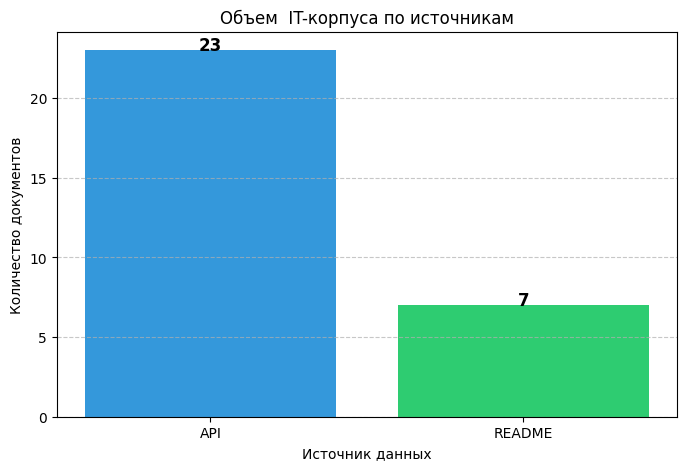

In [19]:
# Создаем графики
source_counts = final_df['source'].value_counts()

names = source_counts.index
values = source_counts.values

plt.figure(figsize=(8, 5))

plt.bar(names, values, color=['#3498db', '#2ecc71'])

plt.ylabel('Количество документов')
plt.xlabel('Источник данных')
plt.title('Объем  IT-корпуса по источникам')
# Красивая подпись сверху
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [20]:
readme_tokens = [
    item for sublist in final_df[final_df['source'] == 'README']['tokens_pos'] # Без sublist too many values
    for item in sublist
]
api_tokens = [
    item for sublist in final_df[final_df['source'] == 'API']['tokens_pos']
    for item in sublist
]

print(f"Слов в куче README: {len(readme_tokens)}")
print(f"Слов в куче API: {len(api_tokens)}")

def calculate_ttr(tokens_list):

    words = [item[0] for item in tokens_list]

    unique = len(set(words))
    total = len(words)

    return round(unique / total, 3)

# Считаем для каждой кучи отдельно
readme_ttr = calculate_ttr(readme_tokens)
api_ttr = calculate_ttr(api_tokens)

print(f"Глобальное богатство README: {readme_ttr}")
print(f"Глобальное богатство API Docs: {api_ttr}")

Слов в куче README: 3619
Слов в куче API: 11767
Глобальное богатство README: 0.257
Глобальное богатство API Docs: 0.13


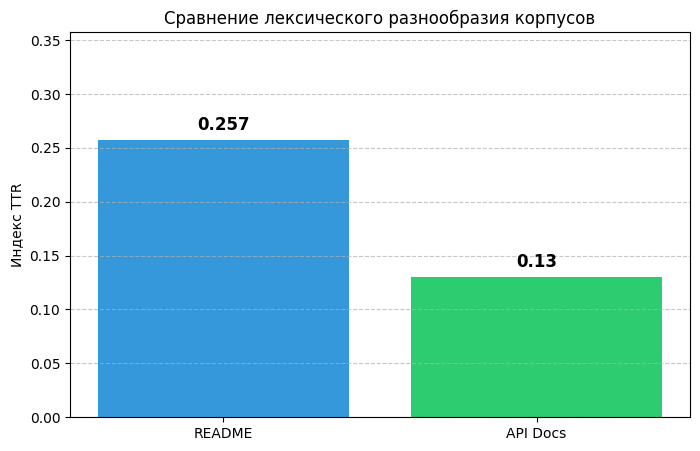

In [21]:

labels = ['README', 'API Docs']
values = [readme_ttr, api_ttr]

plt.figure(figsize=(8, 5))

plt.bar(labels, values, color=['#3498db', '#2ecc71'])

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold', fontsize=12)

plt.ylim(0, max(values) + 0.1) # Место сверху для красоты
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Индекс TTR')
plt.title('Сравнение лексического разнообразия корпусов')
plt.show()

--2026-02-24 18:14:20--  https://github.com/google/fonts/raw/main/ofl/notosanssc/NotoSansSC%5Bwght%5D.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/notosanssc/NotoSansSC%5Bwght%5D.ttf [following]
--2026-02-24 18:14:20--  https://raw.githubusercontent.com/google/fonts/main/ofl/notosanssc/NotoSansSC%5Bwght%5D.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17772300 (17M) [application/octet-stream]
Saving to: ‘font.ttf’

font.ttf            100%[===================>]  16.95M  --.-KB/s    in 0.05s   

2026-02-24 18:14:20 (346 MB/s) - ‘font.ttf’ saved [17772300/177

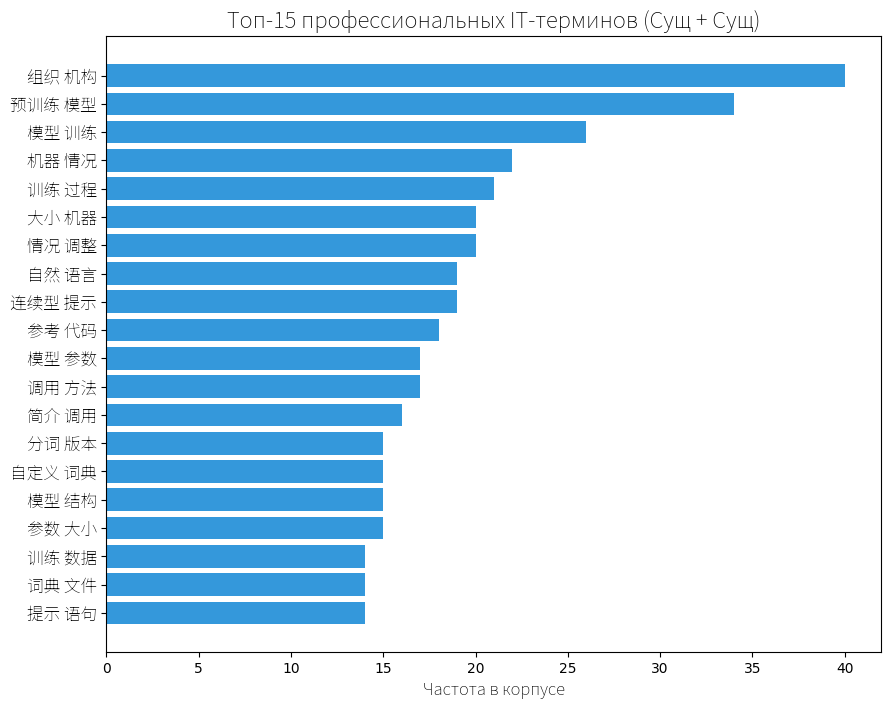

In [22]:

# Качаем шрифт для иероглифов
!wget "https://github.com/google/fonts/raw/main/ofl/notosanssc/NotoSansSC%5Bwght%5D.ttf" -O font.ttf
prop = fm.FontProperties(fname='font.ttf')

top_nn = nn_freq.most_common(20)

labels = [item[0] for item in top_nn]
values = [item[1] for item in top_nn]

plt.figure(figsize=(10, 8))

plt.barh(labels, values, color='#3498db')

plt.gca().invert_yaxis()

plt.title('Топ-15 профессиональных IT-терминов (Сущ + Сущ)', fontproperties = prop, fontsize=16)
plt.xlabel('Частота в корпусе', fontproperties = prop, fontsize=12)

plt.yticks(fontproperties=prop, fontsize=12)

plt.show()

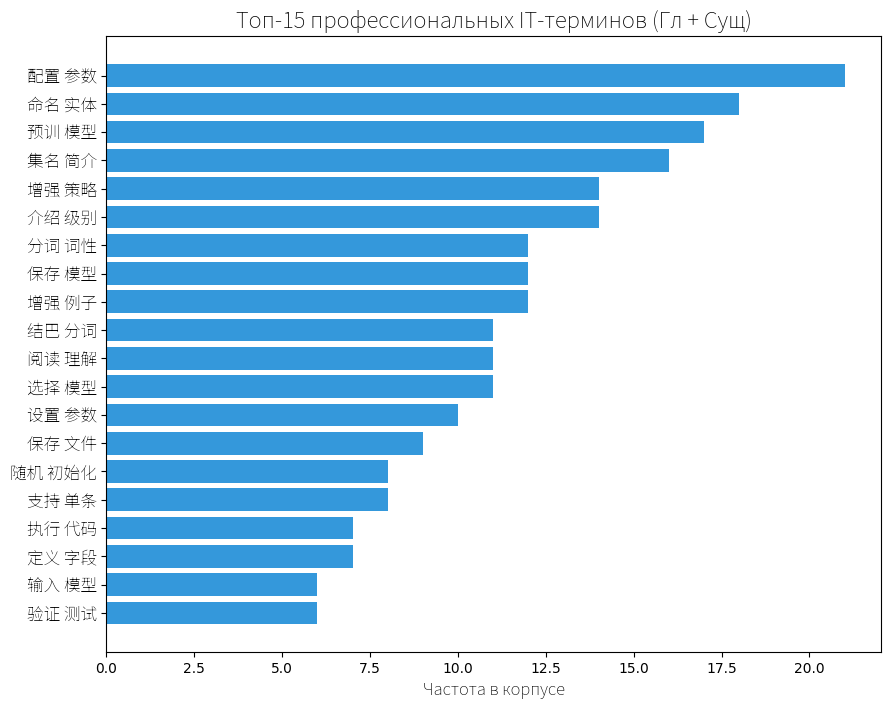

In [23]:
top_vn = vn_freq.most_common(20)

labels = [item[0] for item in top_vn]
values = [item[1] for item in top_vn]

plt.figure(figsize=(10, 8))

plt.barh(labels, values, color='#3498db')

plt.gca().invert_yaxis()

plt.title('Топ-15 профессиональных IT-терминов (Гл + Сущ)', fontproperties=prop, fontsize=16)
plt.xlabel('Частота в корпусе', fontproperties=prop, fontsize=12)

plt.yticks(fontproperties=prop, fontsize=12)

plt.show()